#Турик Олександр КН-410

##Завдання: 
Вибрати з інтернету набори зображень з різною контрастністю і різним флуктуаціями  освітленості. Для кожного зображення побудувати варіант спотвореного (видозміненого  зображення). Для кожної отриманої пари побудувати дескриптор і проаналізувати  можливість суміщення цих зображень і з визначення параметрів геметричних перетворень  (кут повороту, зміщень в напрямку х і напрямку y). 



In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("/content/drive/MyDrive/Computer Vision/lab2/photo_2022-04-18_08-26-08.jpg", cv2.IMREAD_GRAYSCALE)
crop_image = image[100:500,100:500]
image1 = cv2.imread("/content/drive/MyDrive/Computer Vision/lab2/photo_2022-04-18_10-38-34.jpg", cv2.IMREAD_GRAYSCALE)
crop_image1 = image[500:600, 500:600]

In [4]:
sift = cv2.SIFT_create()
kpts1, desc1 = sift.detectAndCompute(image, None)
kpts2, desc2 = sift.detectAndCompute(crop_image, None)
kpts3, desc3 = sift.detectAndCompute(image1, None)
kpts4, desc4 = sift.detectAndCompute(crop_image1, None)

In [11]:
desc1.shape

(14786, 128)

In [12]:
desc2.shape

(842, 128)

In [5]:
def draw_matches(img, kp, scene1, kp1, cust_matches1):
    cust_res1 = cv2.drawMatches(img, kp, scene1, kp1, cust_matches1, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize = (15, 15))
    plt.imshow(cust_res1)
    plt.show()

In [20]:
def match(des, des1):
    cust_matches = []
    for i, des_value in enumerate(des):
        for j, des1_value in enumerate(des1):
            cust_matches.append(cv2.DMatch(
                                      _distance=int(np.linalg.norm(des_value-des1_value)), # vector norm
                                      _queryIdx=i,
                                      _trainIdx=j
                                      ))
    return sorted(cust_matches, key = lambda x:x.distance)

In [21]:
matches = match(desc1, desc2)
draw_matches(image, kpts1, crop_image, kpts2, matches)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
len(matches)

12449812

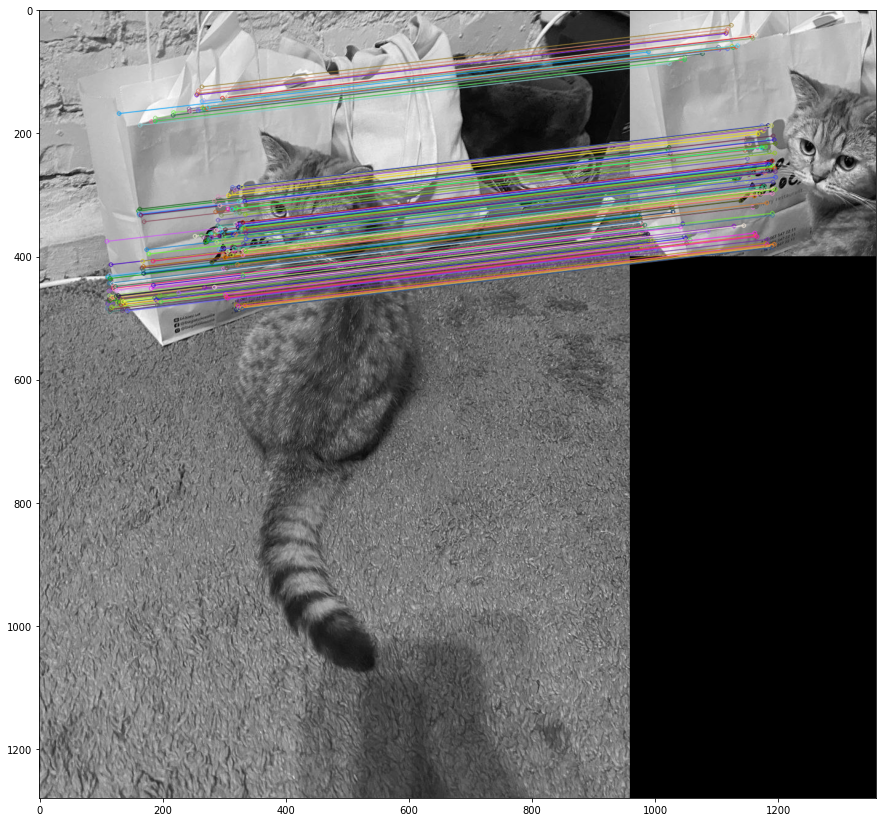

In [24]:
draw_matches(image, kpts1, crop_image, kpts2, matches[:100])

In [25]:
def BFMatcher(des1, des2):# create BFMatcher object 
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1,des2) 
    return sorted(matches, key = lambda x:x.distance) 

827


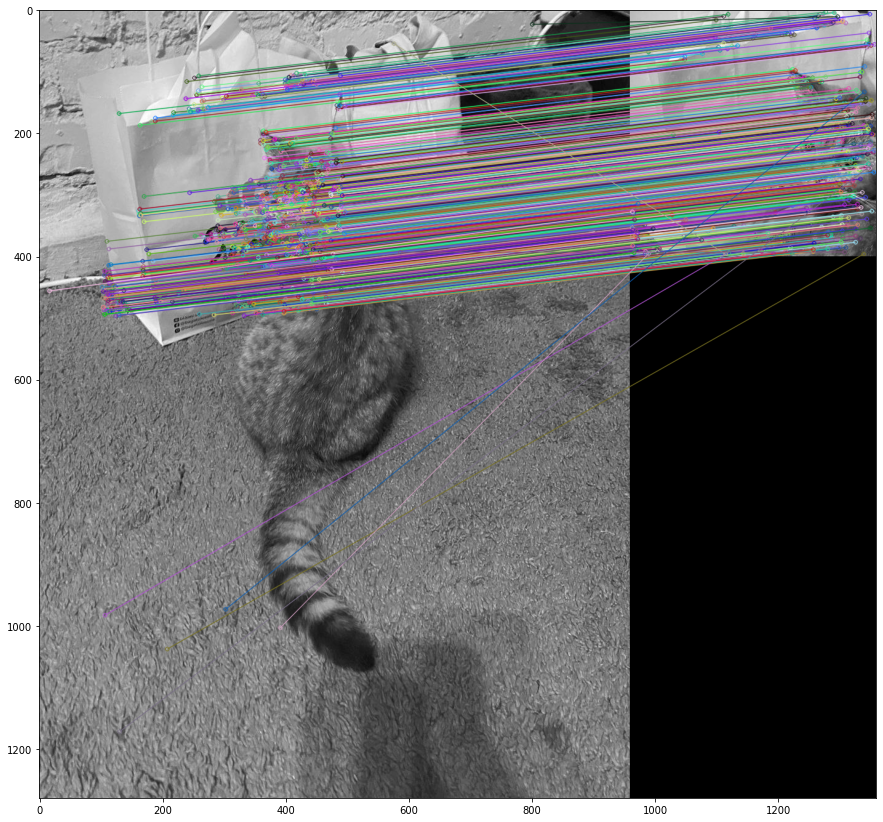

In [29]:
matches = BFMatcher(desc1, desc2)
print(len(matches))
draw_matches(image, kpts1, crop_image, kpts2, matches)

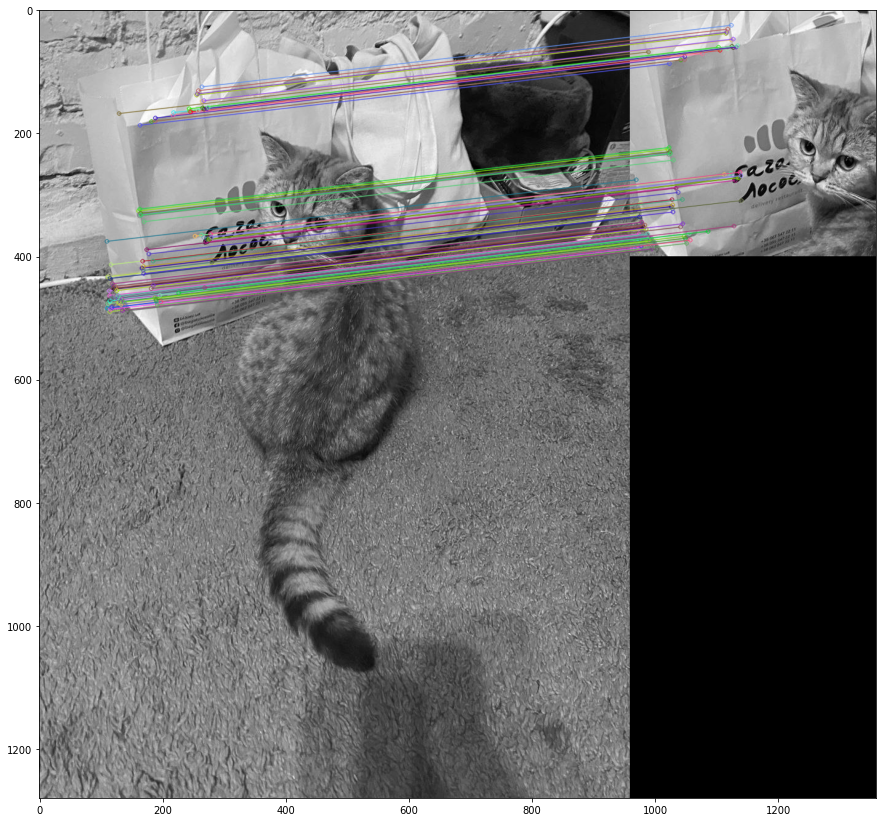

In [28]:
draw_matches(image, kpts1, crop_image, kpts2, matches[:100])